# Tweet exploration

## Setup

### Import libraries

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 

from datetime import datetime

In [2]:
import nltk

### Merge datasets

In [3]:
def generate_file_path(keywords_type: str, since: str, until: str) -> str: 
    """Description. Generate file path based on group of keywords and dates."""

    return f"../backup/tweets/{keywords_type}_{since}_{until}.csv"

def test_generate_file_path(): 

    assert generate_file_path("prices", "2020-01-01", "2020-12-31") == "../backup/tweets/prices_2020-01-01_2020-12-31.csv"

test_generate_file_path()

In [4]:
# years = (2020, 2021, 2022)
# keywords_type = "prices"

# df = pd.DataFrame()

# for y in years: 
#     since = f"{y}-01-01"
#     until = f"{y}-12-31"

#     tmp = pd.read_csv(generate_file_path(keywords_type, since, until))
#     df = pd.concat([df, tmp])

df = pd.read_csv(generate_file_path("econ_terms", "2022-01-01", "2022-12-31"))

## Basic exploration

In [5]:
df.tail()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
2060,TVA nouvelles,@tvanouvelles,2022-02-26T12:20:41.000Z,TVA nouvelles\n@tvanouvelles\n·\n26 Feb 2022,Combat contre l’inflation: un 2e chèque d’aide...,NaN,44.0,18,23,['https://pbs.twimg.com/media/FMhbNP6WYAIp-cz?...,https://twitter.com/tvanouvelles/status/149754...
2061,OCDE,@OCDE_fr,2022-02-26T14:00:13.000Z,OCDE\n@OCDE_fr\n·\n26 Feb 2022,numéro de la lettre d’information de l’#OCDE ...,🆕 👉,NaN,3,4,['https://pbs.twimg.com/media/FMhx_H_XoAYMRd_?...,https://twitter.com/OCDE_fr/status/14975722134...
2062,Philippe THÉVENIAUD,@TheveniaudPhil,2022-02-26T08:58:12.000Z,Philippe THÉVENIAUD\n@TheveniaudPhil\n·\n26 Fe...,"INFLATION : 3,6% sur 1 année\nPrix de l'énergi...",🔴 🔴 🔴,NaN,1,3,['https://pbs.twimg.com/media/FMgs3UBXsAIs7HZ?...,https://twitter.com/TheveniaudPhil/status/1497...
2063,Andre Silver Konan,@andresilverkona,2022-02-26T19:39:37.000Z,Andre Silver Konan\n@andresilverkona\n·\n26 Fe...,Inflation au Sénégal : Macky Sall subventionne...,NaN,8.0,7,41,[],https://twitter.com/andresilverkona/status/149...
2064,Corazón de melón,@bartobovary,2022-02-26T23:28:30.000Z,Corazón de melón\n@bartobovary\n·\n27 Feb 2022,URGENT - Jean Castex annonce la mesure la plu...,🚨,NaN,NaN,5,[],https://twitter.com/bartobovary/status/1497715...


In [360]:
unique_users = df.UserName.unique().shape[0]
print(f"{unique_users} unique users in the dataset")

5344 unique users in the dataset


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserScreenName  9533 non-null   object 
 1   UserName        9554 non-null   object 
 2   Timestamp       9554 non-null   object 
 3   Text            9554 non-null   object 
 4   Embedded_text   9554 non-null   object 
 5   Emojis          1797 non-null   object 
 6   Comments        1599 non-null   float64
 7   Likes           2711 non-null   float64
 8   Retweets        3618 non-null   object 
 9   Image link      9554 non-null   object 
 10  Tweet URL       9554 non-null   object 
dtypes: float64(2), object(9)
memory usage: 821.2+ KB


In [362]:
df.columns = df.columns.str.lower()

In [363]:
for index, row in df.iterrows():
    break 

In [364]:
row

userscreenname                                              Pharid.
username                                             @Pietro_Tavera
timestamp                                  2020-01-01T07:41:04.000Z
text                         Pharid.\n@Pietro_Tavera\n·\n1 Jan 2020
embedded_text     QI <100 : Si un pays manque d'argent, il n'a q...
emojis                                                            🌙
comments                                                        4.0
likes                                                         109.0
retweets                                                        323
image link        ['https://pbs.twimg.com/media/ENLf_HGWkAAyPDK?...
tweet url         https://twitter.com/Pietro_Tavera/status/12122...
Name: 0, dtype: object

In [365]:
print(row.embedded_text) 

QI <100 : Si un pays manque d'argent, il n'a qu'à imprimer plus de billets

QI 115 : T'es con ou quoi bla bla bla masse monétaire augmente ça engendre de l'inflation donc ça sert à rien

QI >130 : Si un pays manque d'argent, il n'a qu'à imprimer plus de billets
4
109
323


In [367]:
cols = ["timestamp", "embedded_text", "retweets", "likes", "comments"]
df = df.loc[:, cols]

In [88]:
df.head()

,timestamp,embedded_text,retweets,likes,comments
0,2020-01-01T23:35:37.000Z,Nintendo ils peuvent sortir 14 versions d'anim...,"1,890",532,4.0
1,2020-01-01T22:56:02.000Z,Le décret sur la rupture conventionnelle dans ...,"1,320",482,42.0
2,2020-01-01T23:57:27.000Z,"Gngn ""adam driver il est trop laid"" bande d'in...",138,43,1.0
3,2020-01-01T21:11:46.000Z,"2020 : Hausse du prix du Tabac, cotons-tiges e...",240,186,1.0
4,2020-01-01T22:00:57.000Z,jahsvahvshavqhahhahaha mais jv lui prendre un ...,9,3,1.0


In [89]:
from typing import Union
import pytest 

def string_to_float(x: Union[float, int, str]) -> float: 
    """Description. 
    Convert int or string object to float."""

    if type(x) == float: 
        return x
    
    elif type(x) == int: 
        return float(x)

    elif type(x) == str: 
        x = x.lower()
        
        if "k" in x: 
            x = x.replace("k", "")
            if "." in x: 
                x = x.split(".") 
                mul = 10**max(0, 3 - len(x[-1]))
                x = "".join(x)
            else: 
                mul = 1000
            x = mul * float(x.replace(",", ""))
        else: 
            x = float(x.replace(",", ""))

        return x

    else: 
        raise ValueError("x must be of type float, int or str.")
    
def test_string_to_float(): 

    assert string_to_float("34") == 34.
    assert string_to_float(34) == 34. 
    assert string_to_float("15K") == 15000.
    assert string_to_float("12.92k") == 12920.

    with pytest.raises(ValueError):
        string_to_float("34a")

test_string_to_float()

In [90]:
def to_datetime(x: str) -> datetime: 
    """Description. Convert string object to datetime."""
    if "T" not in x: 
        raise ValueError("T not in input.")
    
    return datetime.strptime(x.split("T")[0], "%Y-%m-%d") 

def test_to_datetime(): 

    input = "2020-01-01T07:41:04.000Z"
    assert type(to_datetime(input)) == datetime
    assert to_datetime(input).strftime("%Y-%m-%d") == "2020-01-01"

    input = "2020-01-0107:41:04.000Z"
    with pytest.raises(ValueError):
        to_datetime(input)

test_to_datetime()

In [92]:
num_cols = ("retweets", "likes", "comments")

for col in num_cols: 
    df[col] = df[col].apply(string_to_float) 

In [93]:
df["timestamp"] = df["timestamp"].apply(to_datetime)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10930 entries, 0 to 3639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      10930 non-null  datetime64[ns]
 1   embedded_text  10930 non-null  object        
 2   retweets       10861 non-null  float64       
 3   likes          10234 non-null  float64       
 4   comments       7857 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 512.3+ KB


In [95]:
by = [df.timestamp.dt.date]
num_cols = ["retweets", "likes", "comments"]

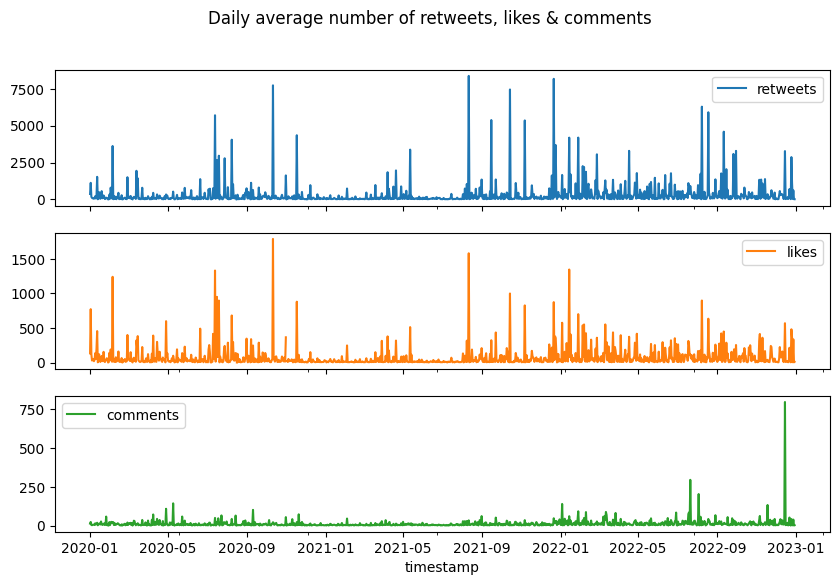

In [96]:
df.groupby(by).\
    mean(num_cols).\
    plot(subplots=True, figsize=(10, 6), title="Daily average number of retweets, likes & comments"); 

In [97]:
n_vals_per_day = np.unique(df.groupby(by).size().values)[0] 
print(f"{n_vals_per_day} tweets per day") 

10 tweets per day


## Text preprocessing

### Import `nltk` sub-modules

In [98]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pemma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pemma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Extract tweets

In [257]:
tweets = df["embedded_text"].values.tolist()
n_tweets = len(tweets)

In [268]:
ix = int(np.random.uniform(low=0, high=n_tweets))
tweet = tweets[ix]
print(tweet)

 Raphinha rejoindra le Bayern Munich lors du mercato d'hiver pour un montant de 50 millions d'euros.

 
@TNTSportsBR
34
491
2,133


In [269]:
tweet

" Raphinha rejoindra le Bayern Munich lors du mercato d'hiver pour un montant de 50 millions d'euros.\n\n \n@TNTSportsBR\n34\n491\n2,133"

### Remove tweet attributes 

Attributes: mentions, links, thread, number of likes, retweets, comments

In [187]:
import re

def remove_mentions(tweet: str) -> str: 
    return re.sub("@[A-Za-z0-9_]+","", tweet)

def remove_links(tweet: str) -> str: 
    tmp = re.sub(r"http\S+", "", tweet)
    return re.sub(r"www.\S+", "", tmp)

def test_remove_mentions(): 

    tweet = "Working on a python project with @joe"
    assert remove_mentions(tweet) == "Working on a python project with "

def test_remove_links(): 
    
    tweet = "Go to https://stackoverflow.com/ to get accurate answers"
    assert remove_links(tweet) == "Go to  to get accurate answers"

    tweet = "DeepL uses neural networks to translate sentences. Check it out here: www.deepl.com/translator."
    assert remove_links(tweet) == "DeepL uses neural networks to translate sentences. Check it out here: "

test_remove_mentions()
test_remove_links()

In [248]:
print(remove_mentions(tweet))

les prix des telephones en prison :

iphone 5c/5s = 400€ , 800€ à fleury merogis

iphone 6s = 500 à 600€ 
samsung j7 et j5 = 500€
mini telephone gt-star qui coûte 20€ dehors = 150€

et oui la prison c'est cher.
9
24
107


In [295]:
def remove_tweet_indicators(tweet: str) -> str: 
    """Description. 
    Remove Twitter indicators such as thread or replies."""

    for indicator in ("Show this thread", "Replying to"): 
        tweet = tweet.replace(indicator, "")

    return tweet

def test_remove_tweet_indicator(): 
    tweet = "Replying to \n@zeujahh \nHow old are you ?"
    assert remove_tweet_indicators(tweet) == " \n@zeujahh \nHow old are you ?"

    tweet = "Show this thread \nHere is my complete guide to crypto: "
    assert remove_tweet_indicators(tweet) == " \nHere is my complete guide to crypto: "

test_remove_tweet_indicator()

In [291]:
def remove_tweet_statistics(tweet: str) -> str: 
    """Description. 
    Remove number of retweets, likes and comments at the end of the text."""

    lines = [
        line 
        for line in tweet.splitlines()
        if len(line.split(" ")) > 1 and line.isdigit() == False
    ]
    
    return " ".join(lines)

def test_remove_tweet_statistics(): 

    tweet = "Very high inflation in 2022!\n4\n28k\n190"
    assert remove_tweet_statistics(tweet) == "Very high inflation in 2022!"

test_remove_tweet_statistics()

In [292]:
remove_tweet_statistics(tweet)

" Raphinha rejoindra le Bayern Munich lors du mercato d'hiver pour un montant de 50 millions d'euros.  "

In [296]:
def clean_tweet(tweet: str) -> str: 
    """Description. 
    Remove mentions, links, thread indicator and statistics from tweet."""

    funs = (remove_links, remove_mentions, remove_tweet_indicators, remove_tweet_statistics)
    for f in funs: 
        tweet = f(tweet)
    return tweet

def test_clean_tweet(): 

    tweet = " Raphinha rejoindra le Bayern Munich pour un montant de 50 millions d'euros.\n\n \n@TNTSportsBR\n34\n491\n2,133"
    assert clean_tweet(tweet) == " Raphinha rejoindra le Bayern Munich pour un montant de 50 millions d'euros.  "

test_clean_tweet()

In [297]:
# clean all tweets 

tweets_cleaned = [clean_tweet(tweet) for tweet in tweets] 

#### Tokenize tweets 

The regular expression `r"(\w+|[^\w\s]+)"` matches sequences of word characters (letters, digits, and underscores).

In [298]:
from typing import List 

def tokenize_tweet(tweet: str) -> List: 
    """Description. Convert tweet into list of tokens."""

    pattern = r"(\w+|[^\w\s]+)"
    return nltk.regexp_tokenize(tweet.lower(), pattern)

def test_tokenize_tweet(): 

    tweet = "Ce tweet est destinée à toutes les personnes voulant se lancer dans le commerce."
    tokens = ["ce" ,"tweet", "est", "destinée", "à", "toutes", "les", "personnes", "voulant", "se", "lancer", "dans", "le", "commerce", "."]
    assert tokenize_tweet(tweet) == tokens 

    with pytest.raises(AttributeError): 
        tokenize_tweet(["hello", "world"])

test_tokenize_tweet()

In [299]:
tweets_tokenized = [tokenize_tweet(tweet) for tweet in tweets_cleaned]

In [300]:
ix = int(np.random.uniform(low=0, high=n_tweets))

print(f"Original tweet: {tweets[ix]}\n\n")
print(f"Tokenized tweet: {tweets_tokenized[ix]}")

Original tweet: Les bonnes conversations avec les bonnes personnes n'ont pas de prix.
4
12


Tokenized tweet: ['les', 'bonnes', 'conversations', 'avec', 'les', 'bonnes', 'personnes', 'n', "'", 'ont', 'pas', 'de', 'prix', '.']


In [301]:
num_tokens_avg = np.mean([len(tweet) for tweet in tweets_tokenized])

print(f"{int(num_tokens_avg)} tokens per tweet on average")

41 tokens per tweet on average


In [302]:
num_tokens_total = np.sum([len(tweet) for tweet in tweets_tokenized])

print(f"{num_tokens_total} tokens over all tweets")

452861 tokens over all tweets


#### Remove punctuation

In [303]:
from typing import List 
import string

def remove_punctuation(sentence: List) -> List: 
    """Description. Remove punctuation from list of words."""

    sentence_new = [] 

    for word in sentence:
        for character in string.punctuation:
            word = word.replace(character, "")
        if word != "":
            sentence_new.append(word)
    
    return sentence_new

def test_remove_punctuation(): 

    sentence = ["hello", "world", "!"]
    assert remove_punctuation(sentence) == ["hello", "world"]

    sentence = ["!", ","]
    assert remove_punctuation(sentence) == []

    tweet = "I love #Python."
    assert remove_punctuation(tokenize_tweet(tweet)) == ["i", "love", "python"]

test_remove_punctuation()

In [304]:
tweets_no_punctuation = [remove_punctuation(tweet) for tweet in tweets_tokenized]

In [315]:
ix = int(np.random.uniform(low=0, high=len(tweets_tokenized)))

print(f"Original tweet: {tweets[ix]}\n\n")
print(f"Tokenized without punctuation: {tweets_no_punctuation[ix]}")

Original tweet: Patek Philippe
Lalène indile avec les bracelets qui tournent et la montre à double face 
Maname montre « recto verso »
@SunuMontres
 yay boooondit

Prix: 45 000frcs
Livraison gratuite
NB:Stock Limité
Sunu Montre
@SunuMontres
·
1 Mar 2021
0:15
Kay Léne Kay léne Lou baissa beiss
lou beissa beiss thi @SunuMontres 
Lale lène 
12
12


Tokenized without punctuation: ['patek', 'philippe', 'lalène', 'indile', 'avec', 'les', 'bracelets', 'qui', 'tournent', 'et', 'la', 'montre', 'à', 'double', 'face', 'maname', 'montre', '«', 'recto', 'verso', '»', 'yay', 'boooondit', 'prix', '45', '000frcs', 'livraison', 'gratuite', 'nb', 'stock', 'limité', 'sunu', 'montre', '1', 'mar', '2021', 'kay', 'léne', 'kay', 'léne', 'lou', 'baissa', 'beiss', 'lou', 'beissa', 'beiss', 'thi', 'lale', 'lène']


#### Remove stopwords

In [316]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

In [317]:
from nltk.corpus import stopwords

In [319]:
stoplist = list(set(stopwords.words("french") + list(fr_stop)))
stoplist.remove("pas")

print(f"{len(stoplist)} french stopwords")

assert "pas" not in stoplist

578 french stopwords


In [321]:
stoplist[:10]

['y',
 'elles-memes',
 'douzième',
 'l’',
 'relative',
 'cinquième',
 'semblent',
 "s'",
 'devant',
 'celle-la']

In [322]:
tweets_no_stopwords = [
    [word for word in sentence if word not in stoplist]
    for sentence in tweets_no_punctuation
]

In [323]:
num_tokens_avg_after = np.mean([len(tweet) for tweet in tweets_no_stopwords])

print(f"{int(num_tokens_avg)} tokens per tweet on average before preprocessing")
print(f"{int(num_tokens_avg_after)} tokens per tweet on average after preprocessing")

41 tokens per tweet on average before preprocessing
18 tokens per tweet on average after preprocessing


In [324]:
num_tokens_total_after = np.sum([len(tweet) for tweet in tweets_no_stopwords])

print(f"{num_tokens_total} tokens over all tweets before preprocessing")
print(f"{num_tokens_total_after} tokens over all tweets after preprocessing")

452861 tokens over all tweets before preprocessing
206065 tokens over all tweets after preprocessing


In [327]:
ix = int(np.random.uniform(low=0, high=len(tweets_tokenized)))

print(f"Original tweet: {tweets[ix]}\n\n")
print(f"Tokenized without punctuation nor stopword: {tweets_no_stopwords[ix]}")

Original tweet: Ready to celebrate at #C2022 #eval2022? Oui, oui ! Il y a des prix aussi à #C2022 !
CES-SCÉ
@CES_SCE
·
10 Jun 2022
Join us to celebrate this year’s CES Awards!
As per a long-standing tradition, as part of the annual @CES_SCE_Conf @CES_SCE, a CES Awards luncheon will take place on June 14. It will be live-streamed for the first time! 
https://ed.gr/d4fsx
3
10


Tokenized without punctuation nor stopword: ['ready', 'to', 'celebrate', 'at', 'c2022', 'eval2022', 'oui', 'oui', 'prix', 'c2022', '10', 'jun', '2022', 'join', 'us', 'to', 'celebrate', 'this', 'year', '’', 'awards', 'per', 'long', 'standing', 'tradition', 'part', 'of', 'the', 'annual', 'awards', 'luncheon', 'will', 'take', 'place', 'june', '14', 'it', 'will', 'be', 'live', 'streamed', 'for', 'the', 'first', 'time']


#### Stemming

In [38]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

In [39]:
tweets_stemmed = [
    [porter.stem(word) for word in sentence] 
    for sentence in tweets_no_stopwords
]

In [40]:
tweets_stemmed[ix]

['économi',
 'chinois',
 'redémarr',
 'occid',
 'mesur',
 'achet',
 'chose',
 'déflation',
 'frapp',
 'port',
 'crisefinancier',
 'coronavirusfr',
 'chri',
 'chavagneux',
 'chrischavagneux',
 '·',
 '9',
 'mar',
 '2020',
 'vie',
 'confin',
 'activité',
 'repart',
 'chine']

In [41]:
tweets_cleaned = [" ".join(sentence) for sentence in tweets_stemmed]

In [42]:
tweets_cleaned[ix]

'économi chinois redémarr occid mesur achet chose déflation frapp port crisefinancier coronavirusfr chri chavagneux chrischavagneux · 9 mar 2020 vie confin activité repart chine'

## Embeddings

In [43]:
from sklearn.model_selection import train_test_split

tweets_train, tweets_test = train_test_split(tweets_cleaned, shuffle=True, test_size=0.1)

### Bag-Of-Words + tf-idf

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [45]:
vocabulary = [
    "inflation", 
    "deflation",
    "stagflation",
    "desinflation",
    "inflationniste", 
    "deflationniste",
    "antiinflationniste", 
    "antideflationniste", 
    "ipc", 
    "ipch"
]

pipe = Pipeline([
    ("count", CountVectorizer(vocabulary=vocabulary)),
    ("tfidf", TfidfTransformer())
])

print(pipe)

Pipeline(steps=[('count',
                 CountVectorizer(vocabulary=['inflation', 'deflation',
                                             'stagflation', 'desinflation',
                                             'inflationniste', 'deflationniste',
                                             'antiinflationniste',
                                             'antideflationniste', 'ipc',
                                             'ipch'])),
                ('tfidf', TfidfTransformer())])


In [46]:
pipe.fit(tweets_train)

Pipeline(steps=[('count',
                 CountVectorizer(vocabulary=['inflation', 'deflation',
                                             'stagflation', 'desinflation',
                                             'inflationniste', 'deflationniste',
                                             'antiinflationniste',
                                             'antideflationniste', 'ipc',
                                             'ipch'])),
                ('tfidf', TfidfTransformer())])

In [47]:
dictionary = pipe["count"].get_feature_names_out()
freqs = pipe["tfidf"].idf_

d = pd.DataFrame({
    "word": dictionary,
    "tfidf": freqs
})

d.sort_values(by="tfidf", ascending=False)

,word,tfidf
0,inflation,9.097426
1,deflation,9.097426
2,stagflation,9.097426
3,desinflation,9.097426
4,inflationniste,9.097426
5,deflationniste,9.097426
6,antiinflationniste,9.097426
7,antideflationniste,9.097426
9,ipch,7.017985
8,ipc,4.009830


In [48]:
X_train, X_test = pipe["count"].transform(tweets_train), pipe["count"].transform(tweets_test)

In [49]:
X_train.toarray().sum(axis=0)

array([  0,   0,   0,   0,   0,   0,   0,   0, 205,  11], dtype=int64)

### word2vec

In [58]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [66]:
tweet = tweets[ix]
print(f"Raw tweet: {tweet}\n\n")

tweet_preprocessed = simple_preprocess(tweet)
print(f"Tweet preprocessed using simple_preprocess(): {tweet_preprocessed}\n\n")

tweet_preprocessed2 = tweets_stemmed[ix]
print(f"Tweet preprocessed in text preprocessing: {tweet_preprocessed2}")

Raw tweet: Et donc, l'économie chinoise va redémarrer et l'Occident ne sera pas en mesure d'acheter tant de choses que cela. Est-ce à dire que la déflation frappe déjà à notre porte ?
#CRISEFINANCIERE 
#CoronavirusFrance
Chris Chavagneux
@ChrisChavagneux
·
9 Mar 2020
Il y a une vie après le confinement : l'activité repart en Chine


Tweet preprocessed using simple_preprocess(): ['et', 'donc', 'économie', 'chinoise', 'va', 'redémarrer', 'et', 'occident', 'ne', 'sera', 'pas', 'en', 'mesure', 'acheter', 'tant', 'de', 'choses', 'que', 'cela', 'est', 'ce', 'dire', 'que', 'la', 'déflation', 'frappe', 'déjà', 'notre', 'porte', 'crisefinanciere', 'chris', 'chavagneux', 'chrischavagneux', 'mar', 'il', 'une', 'vie', 'après', 'le', 'confinement', 'activité', 'repart', 'en', 'chine']


Tweet preprocessed in text preprocessing: ['économi', 'chinois', 'redémarr', 'occid', 'mesur', 'achet', 'chose', 'déflation', 'frapp', 'port', 'crisefinancier', 'coronavirusfr', 'chri', 'chavagneux', 'chrischavagneu

In [53]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=100

In [96]:
class Corpus: 
    """Description. An iterator that yields sentences (lists of str)."""

    def __init__(self, sentences: List, preprocess: bool=True):
        self.sentences = sentences
        self.preprocess = preprocess

    def __iter__(self):
        """Description. Iterator over sentences."""
        for s in self.sentences:

            if self.preprocess:
                yield simple_preprocess(s)
            else: 
                yield s

#### Using raw tweets

In [72]:
corpus = Corpus(sentences=tweets)

In [75]:
for tweet in corpus: 
    break 

tweet 

['qi',
 'si',
 'un',
 'pays',
 'manque',
 'argent',
 'il',
 'qu',
 'imprimer',
 'plus',
 'de',
 'billets',
 'qi',
 'es',
 'con',
 'ou',
 'quoi',
 'bla',
 'bla',
 'bla',
 'masse',
 'monétaire',
 'augmente',
 'ça',
 'engendre',
 'de',
 'inflation',
 'donc',
 'ça',
 'sert',
 'rien',
 'qi',
 'si',
 'un',
 'pays',
 'manque',
 'argent',
 'il',
 'qu',
 'imprimer',
 'plus',
 'de',
 'billets']

In [67]:
n_components = 200
window = 5
min_count = 2

model = Word2Vec(
    min_count=min_count,
    vector_size=n_components, 
    window=window)

In [70]:
model.__dict__

{'vector_size': 200,
 'workers': 3,
 'epochs': 5,
 'train_count': 0,
 'total_train_time': 0,
 'batch_words': 10000,
 'sg': 0,
 'alpha': 0.025,
 'min_alpha': 0.0001,
 'window': 5,
 'shrink_windows': True,
 'random': RandomState(MT19937) at 0x1DDC9A20340,
 'hs': 0,
 'negative': 5,
 'ns_exponent': 0.75,
 'cbow_mean': 1,
 'compute_loss': False,
 'running_training_loss': 0,
 'min_alpha_yet_reached': 0.025,
 'corpus_count': 0,
 'corpus_total_words': 0,
 'max_final_vocab': None,
 'max_vocab_size': None,
 'min_count': 2,
 'sample': 0.001,
 'sorted_vocab': 1,
 'null_word': 0,
 'cum_table': None,
 'raw_vocab': None,
 'wv': <gensim.models.keyedvectors.KeyedVectors at 0x1ddca7272e0>,
 'hashfxn': <function hash(obj, /)>,
 'seed': 1,
 'layer1_size': 200,
 'comment': None,
 'load': <function gensim.utils.call_on_class_only(*args, **kwargs)>,
 'lifecycle_events': [{'params': 'Word2Vec<vocab=0, vector_size=200, alpha=0.025>',
   'datetime': '2023-01-23T15:39:41.412292',
   'gensim': '4.3.0',
   'python

In [77]:
model.build_vocab(corpus, progress_per=1000)

In [79]:
print(f"Total examples={model.corpus_count}")
print(f"Number of epochs={model.epochs}")

Total examples=3650
Number of epochs=5


In [80]:
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

(492081, 708295)

In [86]:
model.wv.most_similar("inflation")

[('le', 0.9993164539337158),
 ('croissance', 0.9991421103477478),
 ('en', 0.9989888668060303),
 ('baisse', 0.998942494392395),
 ('et', 0.998802125453949),
 ('sur', 0.9987058639526367),
 ('valeur', 0.9986454248428345),
 ('marché', 0.998593270778656),
 ('monnaie', 0.9984492659568787),
 ('depuis', 0.9982176423072815)]

In [90]:
model.wv.similarity(w1="inflation", w2="maison")

0.98084474

In [91]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/8200 is de
word #1/8200 is la
word #2/8200 is inflation
word #3/8200 is le
word #4/8200 is les
word #5/8200 is en
word #6/8200 is et
word #7/8200 is des
word #8/8200 is est
word #9/8200 is du


#### Using preprocessed tweets

In [99]:
corpus2 = Corpus(sentences=tweets_no_stopwords, preprocess=False)

In [100]:
for tweet in corpus2: 
    break

tweet

['qi',
 '100',
 'pays',
 'manque',
 'argent',
 'imprimer',
 'billets',
 'qi',
 '115',
 'con',
 'bla',
 'bla',
 'bla',
 'masse',
 'monétaire',
 'augmente',
 'engendre',
 'inflation',
 'sert',
 'rien',
 'qi',
 '130',
 'pays',
 'manque',
 'argent',
 'imprimer',
 'billets',
 '4',
 '109',
 '324']

In [104]:
n_components = 100
window = 7
min_count = 2

model2 = Word2Vec(
    sentences=corpus, 
    min_count=min_count,
    vector_size=n_components, 
    window=window)

In [106]:
model2.__dict__

{'vector_size': 100,
 'workers': 3,
 'epochs': 5,
 'train_count': 1,
 'total_train_time': 0.5891206000019338,
 'batch_words': 10000,
 'sg': 0,
 'alpha': 0.025,
 'min_alpha': 0.0001,
 'window': 7,
 'shrink_windows': True,
 'random': RandomState(MT19937) at 0x1DDCA509240,
 'hs': 0,
 'negative': 5,
 'ns_exponent': 0.75,
 'cbow_mean': 1,
 'compute_loss': False,
 'running_training_loss': 0.0,
 'min_alpha_yet_reached': 0.0003046575342465739,
 'corpus_count': 3650,
 'corpus_total_words': 104349,
 'max_final_vocab': None,
 'max_vocab_size': None,
 'min_count': 2,
 'sample': 0.001,
 'sorted_vocab': 1,
 'null_word': 0,
 'cum_table': array([  26857384,   52663236,   71848246, ..., 2147297657, 2147390652,
        2147483647], dtype=uint32),
 'raw_vocab': defaultdict(int, {}),
 'wv': <gensim.models.keyedvectors.KeyedVectors at 0x1ddca41d220>,
 'hashfxn': <function hash(obj, /)>,
 'seed': 1,
 'layer1_size': 100,
 'comment': None,
 'load': <function gensim.utils.call_on_class_only(*args, **kwargs)>,


In [118]:
keys = model2.wv.index_to_key
print(f"{len(keys)} elements in the dictionary\n")

for index, word in enumerate(keys):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

8342 elements in the dictionary

word #0/8200 is inflation
word #1/8200 is ’
word #2/8200 is 1
word #3/8200 is 2
word #4/8200 is 2020
word #5/8200 is https
word #6/8200 is …
word #7/8200 is 3
word #8/8200 is ·
word #9/8200 is prix


In [111]:
model2.wv.most_similar("inflation")

[('économie', 0.9994660019874573),
 ('intérêt', 0.9994544982910156),
 ('forte', 0.9993888735771179),
 ('immobilier', 0.9993755221366882),
 ('salaires', 0.9992960691452026),
 ('augmentation', 0.9992526173591614),
 ('gouvernement', 0.9991938471794128),
 ('publique', 0.9991593360900879),
 ('économique', 0.9991562962532043),
 ('pays', 0.9991402626037598)]

In [112]:
model2.wv.__dict__

{'vector_size': 100,
 'index_to_key': ['inflation',
  '’',
  '1',
  '2',
  '2020',
  'https',
  '…',
  '3',
  '·',
  'prix',
  '4',
  '5',
  'com',
  'fr',
  'taux',
  'to',
  '6',
  '0',
  '7',
  'replying',
  '10',
  '8',
  '«',
  'crise',
  '»',
  'http',
  'france',
  '€',
  'hausse',
  'déflation',
  'ans',
  '9',
  'contre',
  'ipc',
  'économie',
  'ly',
  'mois',
  '19',
  'salaires',
  'faire',
  'point',
  'indice',
  'and',
  'pays',
  '2019',
  '12',
  'bien',
  'monnaie',
  'euro',
  '11',
  '15',
  'économique',
  '20',
  'the',
  'dette',
  'bce',
  'pouvoir',
  'rdc',
  'covid',
  'bitcoin',
  'politique',
  'augmentation',
  'monétaire',
  'non',
  'bit',
  'euros',
  'baisse',
  'coronavirus',
  'an',
  'argent',
  'banque',
  'consommation',
  'achat',
  '13',
  'monde',
  'thread',
  'economie',
  'twitter',
  'html',
  'gouvernement',
  '30',
  'this',
  'aujourd',
  'covid19',
  '14',
  'niveau',
  'année',
  'banques',
  'show',
  'faut',
  'croissance',
  '16',


In [114]:
vec = model2.wv.vectors

In [115]:
vec.shape

(8342, 100)

## Sentiment analysis

### Using [`textblob-fr`](https://github.com/sloria/textblob-fr)

nb: benchmark sentiment analyser

In [137]:
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [172]:
text = "J'aime moyennement les pâtes"

In [173]:
blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [174]:
blob.sentiment

(0.6, 0.6)

In [138]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
tb

Blobber(tokenizer=WordTokenizer(), pos_tagger=PatternTagger(), np_extractor=FastNPExtractor(), analyzer=PatternAnalyzer(), parser=PatternParser(), classifier=None)

The `sentiment` property returns a `Tuple` of the form `Sentiment(polarity, subjectivity)`. The polarity score is a float within the range $[-1.0, 1.0]$. The subjectivity is a float within the range $[0.0, 1.0]$ where 0.0 is very objective and 1.0 is very subjective. 

In [154]:
ix = np.random.randint(low=0, high=len(tweets))

tweet = tweets[ix]
print(tweet)

blob = tb(tweet) 
polarity, subjectivity = blob.sentiment

print(f"\n{polarity=}\n")
print(f"{subjectivity=}")

Si je comprends bien les théoriciens de la MMT : en absence de croissance et d'inflation on peut faire tourner la planche a billets pour faire redémarrer la croissance, tant que... les salaires n'augmentent pas?
Christopher Dembik
@Dembik_Chris
·
14 Nov 2020
A gauche, beaucoup se disent prêt pour 2022. Soit. Mais quelle est leur vision de la société post-Covid, certainement plus fracturée et plus inégalitaire ? Quelles sont leurs idées pour faire face au chômage, à la dette etc...? Un avis sur les thèses proches de la MMT ?
1
1
1

polarity=0.11875

subjectivity=0.24375000000000002
